C:\Users\asia\AppData\Local\Temp\ipykernel_23912\261328176.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\asia\AppData\Local\Temp\ipykernel_23912\261328176.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
C:\Users\asia\AppData\Local\Temp\ipykernel_23912\261328176.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

사용자의 생활습관 수치를 입력해주세요.

홍길동님은 수축기 혈압 140.0, 이완기 혈압 90.0를 고려했을 때 HE_HP2 = 4, 고혈압에 속합니다.
1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 하루 평균 채소류/버섯류/해조류 섭취 빈도를 고려했을 때 고혈압 그룹의 2번 군집에 속합니다.

✅ 사용자 생활습관 vs 군집 평균 비교:
| 항목                                     |   홍길동님 수치 |   군집 2 평균 수치 |
|:-----------------------------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도                       |            5.00 |               5.50 |
| 하루 평균 흡연량                         |            2.00 |               2.22 |
| 1주일 간 걷기 일수                       |            3.00 |               3.86 |
| 하루 평균 채소류/버섯류/해조류 섭취 빈도 |            3.00 |               2.40 |


c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


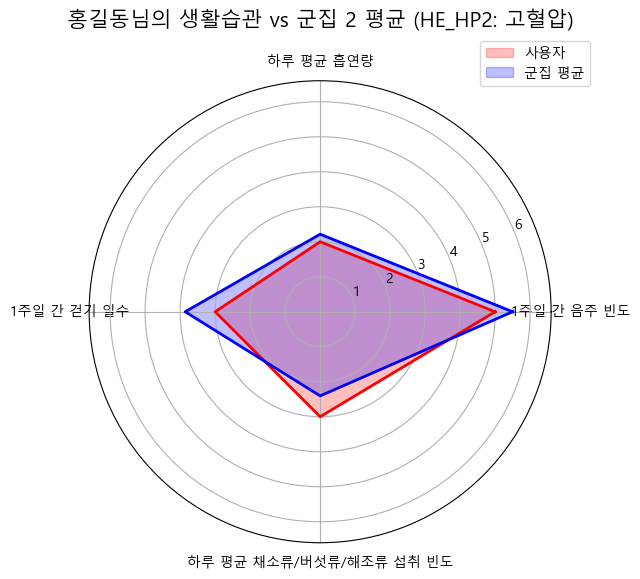

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리 (제공된 노트북 기반)
# 실제 데이터 파일 경로로 수정 필요
df = pd.read_csv("건강데이터_2022_2023_합본.csv")
# --- 데이터 불러오기 대신 더미 데이터프레임을 사용합니다. 실제 사용 시 위 라인의 주석을 해제하고 아래 더미 데이터프레임은 제거해주세요. ---



# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({ 
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'7.0' : 6,
'8.0' : 7,
'88.0' : 0,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: LS_VEG1 (최근 1년 동안 평균 채소류 섭취 빈도) - 연간 횟수로 변환
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
    '1.0': 1095, '2.0': 730, '3.0': 365, '4.0': 286, '5.0': 156,
    '6.0': 52, '7.0': 30, '8.0': 12, '9.0': 6, '99.0': np.nan, 'nan': np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도) - 연간 횟수로 변환
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 고혈압 파생변수 생성 (HE_HP2)
def classify_bp(row):
    sbp = row['HE_sbp1']
    dbp = row['HE_dbp1']
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    elif 0<=sbp<120 and dbp < 80:
        return 1


df['HE_HP2'] = df.apply(classify_bp, axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')

# 결측치 제거 및 군집 분석에 사용할 컬럼 선택
df_clustering = df.dropna(subset=['HE_HP2'])
selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'LS_VEG1']

# 선택된 컬럼의 결측치를 최빈값으로 대체 (사용자 코드의 로직 유지)
for col in selected_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
             df_clustering[col].fillna(0, inplace=True)

# --- 제공된 사전 계산된 군집 평균 데이터 ---
# 이 데이터를 사용하여 군집 예측 및 비교에 활용합니다.
# 컬럼 이름은 제공된 텍스트의 이름을 따릅니다.
precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.167185, 0.239176, 3.172158, 1.363797, 0.304851, 0.318776, 0.126048],
        '하루 평균 흡연량': [0.321646, 0.312566, 2.000000, 20.489297, 0.751894, 0.548831, 0.317757],
        '1주일 간 걷기 일수': [0.863567, 6.208025, 4.344316, 3.593272, 2.034091, 6.138927, 0.781931],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.000000, 3.000000, 2.163088, 2.080349, 0.895143, 1.871035, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [0.284722, 2.500000, 0.858974, 0.150502, 0.221657, 5.500000, 0.165176],
        '하루 평균 흡연량': [0.633333, 1.149606, 19.418803, 0.337793, 0.470769, 4.475000, 0.191214],
        '1주일 간 걷기 일수': [6.180556, 4.299213, 3.709402, 1.187291, 1.098462, 4.075000, 6.297158],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [1.796187, 2.448819, 2.183140, 3.000000, 1.785248, 2.387500, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.763355, 0.468248, 1.676724, 0.647671, 5.500000, 0.515860, 0.553569],
        '하루 평균 흡연량': [1.145833, 0.461916, 19.193966, 0.774869, 5.348837, 0.309278, 0.989384],
        '1주일 간 걷기 일수': [5.069444, 1.302211, 3.288793, 6.057592, 4.203488, 6.268041, 1.171975],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [0.925590, 3.000000, 2.207806, 2.000000, 2.347993, 3.000000, 1.914155]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [2.756947, 0.653964, 5.500000, 0.479380, 0.589461, 0.454250],
        '하루 평균 흡연량': [20.293194, 0.917178, 2.215827, 0.298479, 0.627753, 0.253644],
        '1주일 간 걷기 일수': [3.701571, 1.303681, 3.856115, 6.292776, 6.162996, 1.192420],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.301771, 1.801597, 2.403903, 3.000000, 1.854179, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5])
}
# --- 사전 계산된 군집 평균 데이터 끝 ---


# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("하루 평균 채소류/버섯류/해조류 섭취 빈도 (회/일): "))
    return name, sbp, dbp, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg



# HE_HP2 결정 함수
def determine_he_hp2(sbp, dbp):
    if sbp >= 140 or dbp >= 90:
        return 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return 3
    elif 120 <= sbp <= 129 and dbp < 80:
        return 2
    else:
        return 1
    
    
# 군집 결정 함수 (사전 계산된 평균을 이용하도록 수정)
# 이 함수는 군집 분석을 새로 수행하는 대신, 사용자 데이터를 스케일링하고
# 사전 계산된 평균 중심점과의 거리를 계산하여 가장 가까운 군집을 반환합니다.
def determine_cluster_with_precalculated_means(user_data_weekly_daily, hp_value, scaler, precalculated_means_dict, selected_cols):
    hp_value_int = int(hp_value) # 정수형으로 사용

    if hp_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 HE_HP2={hp_value_int} 그룹이 없습니다.")
        return None, None

    # 해당 HE_HP2 그룹의 사전 계산된 평균 데이터 가져오기
    cluster_means_precalculated_text_names = precalculated_means_dict[hp_value_int].copy()

    # Define mapping from text names to internal selected_cols names
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': 'LS_VEG1'
    }

    # Create a DataFrame with internal names and in selected_cols order
    # Note: Ensure the order of columns in this DataFrame matches the order in selected_cols
    # as the scaler was fit on data in selected_cols order.
    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        # Find the text column name corresponding to the internal column name
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)

        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            # Handle case where a column is missing or mapping is incorrect
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_means_precalculated_internal_names[internal_col] = np.nan # 또는 적절한 기본값


    # 스케일링된 사전 계산된 중심점 (군집 평균)
    # 스케일링에 사용될 scaler는 해당 HE_HP2 그룹의 데이터로 fit 되어 있어야 합니다. (메인 함수에서 fit 후 전달)
    # Note: Ensure cluster_means_precalculated_internal_names has no NaNs before scaling
    if cluster_means_precalculated_internal_names.isnull().values.any():
         print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")


    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols]) # selected_cols 순서 사용


    # 사용자 데이터를 군집 분석의 특성 형식(연간음주, 하루흡연, 주간근력운동, 연간채소)으로 변환
    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52, # 1주일 음주 * 52 -> 연간 음주 (BD1_11 unit)
        user_data_weekly_daily[1], # 하루 흡연 (tobacco unit)
        user_data_weekly_daily[2], # 1주일 운동 횟수 (BE5_1 unit - 의미 다를 수 있음)
        user_data_weekly_daily[3] * 365 # 하루 채소 * 365 -> 연간 채소 (LS_VEG1 unit)
    ]

    # 스케일링된 사용자 데이터
    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    # 사용자와 각 중심점 간의 거리 계산
    # numpy 배열 간의 브로드캐스팅을 이용하여 거리 계산
    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)

    # 가장 가까운 중심점 (군집) 찾기
    closest_cluster = np.argmin(distances)

    # 해당 군집의 평균 데이터 (원본 스케일, 텍스트 컬럼명 그대로)
    # precalculated_means_dict[hp_value_int]는 이미 텍스트 컬럼명과 사용자 단위의 DataFrame임
    cluster_means = precalculated_means_dict[hp_value_int].iloc[closest_cluster]

    # 군집 번호와 해당 군집의 평균 데이터 반환
    return closest_cluster, cluster_means


# 레이더 차트 생성 함수 (오류 수정)
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    # user_data_weekly_daily와 cluster_mean_weekly_daily는 이미 주간/일간 단위의 리스트 또는 Series
    values_user = user_data_weekly_daily[:] # List
    # cluster_mean_weekly_daily는 Series 또는 List가 올 수 있음.
    # Series의 경우 .tolist()로 변환하거나 list()로 감싸서 리스트로 만듦.
    # 현재 코드에서는 이미 리스트로 전달되고 있음.
    values_cluster = cluster_mean_weekly_daily[:] # List

    # 최대값 설정 (차트 범위 조절)
    # all_values = values_user + values_cluster.tolist() # <-- 오류 발생 부분: values_cluster는 이미 list
    all_values = values_user + values_cluster # List와 List를 합침

    max_val = max(all_values) if all_values else 1 # 데이터 없을 경우 대비

    # Extend for radar chart closure
    values_user = values_user + values_user[:1]  # Already a list
    # values_cluster = values_cluster.tolist() + values_cluster[:1].tolist() # <-- 오류 발생 부분
    values_cluster = values_cluster + values_cluster[:1] # List와 List 슬라이스를 합침

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Set the maximum value for the radar chart axes
    ax.set_ylim(0, max_val * 1.2)

    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()


# 메인 서비스 함수
def health_comparison_service():
    name, sbp, dbp, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()
    he_hp2 = determine_he_hp2(sbp, dbp)
    he_hp2_labels = {1: "정상", 2: "주의", 3: "고혈압 전단계", 4: "고혈압"}

    if pd.isna(he_hp2):
        print(f"\n혈압 수치 ({sbp}/{dbp})가 유효하지 않아 HE_HP2 분류를 할 수 없습니다.")
        return

    he_hp2_int = int(he_hp2) # 정수형으로 사용

    if he_hp2_int not in precalculated_means:
        print(f"\nHE_HP2 그룹 {he_hp2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        return

    print(f"\n{name}님은 수축기 혈압 {sbp}, 이완기 혈압 {dbp}를 고려했을 때 HE_HP2 = {he_hp2_int}, {he_hp2_labels[he_hp2_int]}에 속합니다.")

    # 해당 HE_HP2 그룹의 데이터 추출 (스케일링을 위해 필요)
    # df_clustering는 위 전처리 단계에서 HE_HP2 결측치 제거 후 생성된 데이터프레임
    hp_df = df_clustering[df_clustering['HE_HP2'] == he_hp2_int][selected_cols].copy()

    # 해당 그룹에 데이터가 충분한지 확인 (스케일링 fit 시 필요)
    if hp_df.empty:
         print(f"\nHE_HP2 그룹 {he_hp2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
         return

    # StandardScaler 객체를 해당 그룹의 데이터로 fit (사전 계산된 평균과 사용자 데이터 스케일링에 사용)
    scaler = StandardScaler()
    scaler.fit(hp_df[selected_cols]) # selected_cols 순서와 이름으로 fit

    # determine_cluster 함수에 사용자 입력 주간/일간 단위를 그대로 전달
    user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]

    # 사전 계산된 평균을 이용하여 가장 가까운 군집 결정
    # determine_cluster_with_precalculated_means 함수 호출
    cluster, cluster_means_for_comparison = determine_cluster_with_precalculated_means(
        user_data_for_cluster_input, he_hp2_int, scaler, precalculated_means, selected_cols
    )

    if cluster is not None:
        # cluster_means_for_comparison는 이미 해당 군집의 사전 계산된 평균 (텍스트 컬럼명, 사용자 단위) Series
        print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 하루 평균 채소류/버섯류/해조류 섭취 빈도를 고려했을 때 {he_hp2_labels[he_hp2_int]} 그룹의 {cluster}번 군집에 속합니다.")

        # --- 테이블 비교 출력 ---
        print("\n✅ 사용자 생활습관 vs 군집 평균 비교:")

        # User input values (already in weekly/daily)
        user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]

        # Comparison cluster mean values (matching user units)
        # cluster_means_for_comparison는 이미 Series 형태로 사용자 단위 평균을 가지고 있음
        cluster_comp_values = cluster_means_for_comparison.tolist() # Series를 리스트로 변환하여 전달

        # 항목 이름 (사용자 입력 항목명과 일치)
        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '하루 평균 채소류/버섯류/해조류 섭취 빈도'] # 오타 수정 완료

        # Create data for the table
        table_data = {
            '항목': item_names,
            f'{name}님 수치': user_values,
            f'군집 {cluster} 평균 수치': cluster_comp_values
        }

        # Create and print the DataFrame
        comparison_df = pd.DataFrame(table_data)
        # 소수점 둘째 자리까지 표시하도록 float 형식 지정
        print(comparison_df.to_markdown(index=False, floatfmt=".2f")) # Markdown 형식으로 깔끔하게 출력

        # --- 테이블 비교 출력 끝 ---


        # 레이더 차트용 데이터 준비 (테이블 비교에서 사용한 단위 그대로 사용)
        categories = item_names # 테이블 항목명을 그대로 사용

        # 레이더 차트 그리기
        # plot_radar_chart 함수는 user_data (weekly/daily list)와 cluster_mean (weekly/daily list)를 받음
        plot_radar_chart(user_values, cluster_comp_values, categories, f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_HP2: {he_hp2_labels[he_hp2_int]})")


    else:
        # determine_cluster_with_precalculated_means 함수에서 이미 메시지 출력
        pass


# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import pi

# 시각화 설정 (한글 폰트 및 음수 표시 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경에서 맑은 고딕 설정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
# 실제 데이터 파일 경로로 수정 필요
df = pd.read_csv("선택컬럼_건강데이터(2022~2023년)_변수추가.csv")
# --- 주의: 실제 데이터 파일이 없으므로, 실행 시 경로를 확인하세요. ---

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({ 
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'7.0' : 6,
'8.0' : 7,
'88.0' : 0,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: LS_VEG1 (최근 1년 동안 평균 채소류 섭취 빈도) - 연간 횟수로 변환
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
    '1.0': 1095, '2.0': 730, '3.0': 365, '4.0': 286, '5.0': 156,
    '6.0': 52, '7.0': 30, '8.0': 12, '9.0': 6, '99.0': np.nan, 'nan': np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주 빈도) - 연간 횟수로 변환
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 당뇨 파생변수 생성 (HE_DM_HbA1c2)
def classify_bp(row):
    glu = row['HE_glu']
    if pd.isna(glu):
        return np.nan
    if glu <= 99:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

df['HE_DM_HbA1c2'] = df.apply(classify_bp, axis=1)
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')

# 결측치 제거 및 군집 분석에 사용할 컬럼 선택
df_clustering = df.dropna(subset=['HE_DM_HbA1c2'])
selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'LS_VEG1']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in selected_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)

# 사전 계산된 군집 평균 데이터 (HE_DM_HbA1c2 기준)
# 실제 데이터가 없으므로, 사용자 요청에 따라 임의로 설정 (실제 데이터로 대체 필요)
import pandas as pd

# The updated precalculated_means dictionary including HE_DM_HbA1c2 = 3

precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.150946, 0.372085, 1.158756, 0.228997, 5.500000, 2.500000, 0.237966],
        '하루 평균 흡연량': [0.323770, 0.541776, 19.725768, 0.288396, 5.622449, 1.360502, 0.423890],
        '1주일 간 걷기 일수': [0.927049, 5.964267, 2.933806, 6.161263, 3.537415, 3.819749, 0.981501],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.771406, 2.114544, 3.000000, 2.211099, 2.249319, 1.774280]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [0.512626, 0.579406, 5.500000, 1.479076, 0.455288, 0.619097],
        '하루 평균 흡연량': [0.431724, 0.700143, 5.978166, 18.295597, 0.309375, 0.690799],
        '1주일 간 걷기 일수': [6.137931, 0.982783, 3.187773, 2.732704, 1.046875, 6.037707],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.842255, 2.362445, 2.143043, 3.000000, 1.812732]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.145881, 0.142308, 0.546853, 1.466873, 5.500000, 0.098474],
        '하루 평균 흡연량': [0.161702, 0.342857, 0.309091, 20.496350, 6.471264, 0.170241],
        '1주일 간 걷기 일수': [0.331915, 1.023810, 5.949495, 2.905109, 2.977011, 0.239946],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 0.886941, 2.630303, 2.296130, 2.390805, 2.000000]
    }, index=[0, 1, 2, 3, 4, 5])
}

# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    glu = float(input("공복혈당 (mg/dL): "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (일): "))
    daily_veg = float(input("하루 평균 채소류/버섯류/해조류 섭취 빈도 (회): "))
    return name, glu, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# HE_DM_HbA1c2 결정 함수
def determine_he_dm_hba1c2(glu):
    if pd.isna(glu):
        return np.nan
    if glu <= 99:
        return 1
    elif 100 <= glu <= 125:
        return 2
    else:
        return 3

# 군집 결정 함수 (사전 계산된 평균 사용)
def determine_cluster_with_precalculated_means(user_data_weekly_daily, dm_value, scaler, precalculated_means_dict, selected_cols):
    dm_value_int = int(dm_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 HE_DM_HbA1c2={dm_value_int} 그룹이 없습니다.")
        return None, None

    cluster_means_precalculated_text_names = precalculated_means_dict[dm_value_int].copy()

    # 텍스트 이름과 내부 컬럼 이름 매핑
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': 'LS_VEG1'
    }

    # 내부 컬럼명으로 DataFrame 생성 (selected_cols 순서 유지)
    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)
        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_means_precalculated_internal_names[internal_col] = np.nan

    if cluster_means_precalculated_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None

    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols])

    # 사용자 데이터를 군집 분석 특성 형식으로 변환
    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 채소 
    ]

    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    closest_cluster = np.argmin(distances)
    cluster_means = precalculated_means_dict[dm_value_int].iloc[closest_cluster]

    return closest_cluster, cluster_means

# 레이더 차트 생성 함수
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()

# 메인 서비스 함수
def health_comparison_service():
    name, glu, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()
    he_dm_hba1c2 = determine_he_dm_hba1c2(glu)
    he_dm_hba1c2_labels = {1: "정상", 2: "당뇨 전단계", 3: "당뇨"}

    if pd.isna(he_dm_hba1c2):
        print(f"\n공복혈당 수치 ({glu})가 유효하지 않아 HE_DM_HbA1c2 분류를 할 수 없습니다.")
        return

    he_dm_hba1c2_int = int(he_dm_hba1c2)

    if he_dm_hba1c2_int not in precalculated_means:
        print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        return

    print(f"\n{name}님은 공복혈당 {glu}를 고려했을 때 HE_DM_HbA1c2 = {he_dm_hba1c2_int}, {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에 속합니다.")

    hp_df = df_clustering[df_clustering['HE_DM_HbA1c2'] == he_dm_hba1c2_int][selected_cols].copy()

    if hp_df.empty:
        print(f"\nHE_DM_HbA1c2 그룹 {he_dm_hba1c2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
        return

    scaler = StandardScaler()
    scaler.fit(hp_df[selected_cols])

    user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
    cluster, cluster_means_for_comparison = determine_cluster_with_precalculated_means(
        user_data_for_cluster_input, he_dm_hba1c2_int, scaler, precalculated_means, selected_cols
    )

    if cluster is not None:
        print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 하루 평균 채소류/버섯류/해조류 섭취 빈도를 고려했을 때 {he_dm_hba1c2_labels[he_dm_hba1c2_int]}에서 {cluster}번 군집에 속합니다.")

        print("\n✅ 사용자 생활습관 vs 군집 평균 비교:")
        user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
        cluster_comp_values = cluster_means_for_comparison.tolist()
        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '하루 평균 채소류/버섯류/해조류 섭취 빈도']

        table_data = {
            '항목': item_names,
            f'{name}님 수치': user_values,
            f'군집 {cluster} 평균 수치': cluster_comp_values
        }
        comparison_df = pd.DataFrame(table_data)
        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))

        categories = item_names
        plot_radar_chart(user_values, cluster_comp_values, categories,
                         f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_DM_HbA1c2: {he_dm_hba1c2_labels[he_dm_hba1c2_int]})")
    else:
        pass

# 서비스 실행
if __name__ == "__main__":
    health_comparison_service()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# matplotlib 한국어 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("건강데이터_2022_2023_합본.csv")

# 전처리: 1주일간 걷기 일수
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({ 
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'7.0' : 6,
'8.0' : 7,
'88.0' : 0,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

# 전처리: LS_VEG1 (최근 1년 동안 평균 채소류 섭취 빈도)
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
    '1.0': 1095, '2.0': 730, '3.0': 365, '4.0': 286, '5.0': 156,
    '6.0': 52, '7.0': 30, '8.0': 12, '9.0': 6, '99.0': np.nan, 'nan': np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

# 전처리: tobacco (일반 담배 + 전자 담배 하루 평균 흡연량)
df['BS3_2'] = df['BS3_2'].replace(888, 0)
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

# 전처리: BD1_11 (1년간 음주빈도)
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
    '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
    '8.0': 0, '9.0': np.nan, 'nan': np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

# 비만 파생변수 생성 (HE_obe2)
def classify_bp(row):
    bmi = row['HE_BMI']
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

df['HE_obe2'] = df.apply(classify_bp, axis=1)
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

# 결측치 처리 및 데이터 준비
df_clustering = df.dropna(subset=['HE_obe2'])
selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'LS_VEG1']

# 선택된 컬럼의 결측치를 최빈값으로 대체
for col in selected_cols:
    if df_clustering[col].isnull().any():
        mode_value = df_clustering[col].mode(dropna=True)
        if not mode_value.empty:
            df_clustering[col].fillna(mode_value[0], inplace=True)
        else:
            df_clustering[col].fillna(0, inplace=True)


import pandas as pd



precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.041231, 0.499675, 0.140793, 4.500000, 0.955301, 0.043403],
        '하루 평균 흡연량': [0.000000, 0.253165, 0.078788, 7.933333, 17.162162, 0.046875],
        '1주일 간 걷기 일수': [0.144033, 5.886076, 0.454545, 2.766667, 3.513514, 0.138889],
        '하루 평균 채소 섭취 빈도': [3.000000, 2.239894, 0.892453, 2.080913, 2.135061, 2.000000]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.437870, 0.338664, 0.565225, 0.397819, 5.500000],
        '하루 평균 흡연량': [16.953177, 0.164277, 0.426172, 0.364297, 7.000000],
        '1주일 간 걷기 일수': [2.856187, 3.597969, 6.012378, 0.932149, 3.066327],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.208769, 3.000000, 1.795531, 1.804506, 2.276950]
    }, index=[0, 1, 2, 3, 4]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.378722, 0.526020, 0.595941, 5.500000, 1.447802, 0.462214],
        '하루 평균 흡연량': [0.326613, 0.415435, 0.581359, 4.986486, 19.017857, 0.407733],
        '1주일 간 걷기 일수': [0.987903, 0.957307, 5.990521, 3.567568, 2.852679, 6.130053],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.779103, 1.809968, 2.371122, 2.212353, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [0.519089, 0.550410, 2.104251, 0.601160, 0.417795, 5.500000, 1.564362],
        '하루 평균 흡연량': [0.609069, 0.366864, 34.342105, 0.599757, 0.407108, 3.816667, 16.915825],
        '1주일 간 걷기 일수': [1.055147, 6.143491, 3.000000, 5.928224, 1.080775, 3.638889, 2.787879],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [1.812550, 3.000000, 2.289474, 1.808696, 3.000000, 2.355556, 2.102071]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.172308, 0.832751, 0.241978, 5.500000, 2.500000, 0.380881, 0.341026],
        '하루 평균 흡연량': [0.200000, 21.196970, 0.914286, 4.147059, 1.562500, 0.330097, 1.216667],
        '1주일 간 걷기 일수': [5.973333, 3.090909, 5.062857, 3.323529, 4.734375, 0.961165, 0.550000],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.890619, 1.764055, 2.189041, 2.069178, 3.000000, 1.813014]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.175570, 0.255583, 2.500000, 0.225175, 5.500000, 0.913462],
        '하루 평균 흡연량': [0.064815, 0.655914, 5.400000, 0.345455, 9.466667, 22.350000],
        '1주일 간 걷기 일수': [0.435185, 6.139785, 5.466667, 0.563636, 3.133333, 2.400000],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 2.174311, 2.333333, 1.796090, 2.228493, 2.042740]
    }, index=[0, 1, 2, 3, 4, 5])
}


# 사용자 입력 함수
def get_user_input():
    print("사용자의 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    bmi = float(input("BMI: "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("하루 평균 채소류/버섯류/해조류 섭취 빈도 (회): "))
    return name, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# HE_obe2 결정 함수
def determine_he_obe2(bmi):
    if bmi <= 18.5:
        return 1
    elif 18.5 < bmi <= 22.9:
        return 2
    elif 22.9 < bmi <= 24.9:
        return 3
    elif 24.9 < bmi <= 29.9:
        return 4
    elif 29.9 < bmi <= 34.9:
        return 5
    else:
        return 6

# 군집 결정 함수 (사전 계산된 평균 사용)
def determine_cluster_with_precalculated_means(user_data_weekly_daily, dm_value, scaler, precalculated_means_dict, selected_cols):
    dm_value_int = int(dm_value)

    if dm_value_int not in precalculated_means_dict:
        print(f"사전 계산된 군집 평균 데이터에 HE_DM_HbA1c2={dm_value_int} 그룹이 없습니다.")
        return None, None

    cluster_means_precalculated_text_names = precalculated_means_dict[dm_value_int].copy()

    # 텍스트 이름과 내부 컬럼 이름 매핑
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': 'LS_VEG1'
    }

    # 내부 컬럼명으로 DataFrame 생성 (selected_cols 순서 유지)
    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)
        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            print(f"경고: 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 사전 계산된 데이터에 없습니다.")
            cluster_means_precalculated_internal_names[internal_col] = np.nan

    if cluster_means_precalculated_internal_names.isnull().values.any():
        print("경고: 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None

    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols])

    # 사용자 데이터를 군집 분석 특성 형식으로 변환
    user_data_transformed_for_predict = [
        user_data_weekly_daily[0] * 52,  # 주간 음주 -> 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3]        # 채소 
    ]

    user_data_scaled_for_predict = scaler.transform([user_data_transformed_for_predict])

    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled_for_predict, axis=1)
    closest_cluster = np.argmin(distances)
    cluster_means = precalculated_means_dict[dm_value_int].iloc[closest_cluster]

    return closest_cluster, cluster_means

# 레이더 차트 생성 함수
def plot_radar_chart(user_data_weekly_daily, cluster_mean_weekly_daily, categories, title):
    values_user = user_data_weekly_daily[:]
    values_cluster = cluster_mean_weekly_daily[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1

    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.show()


# --- 메인 서비스 함수 ---
def obesity_health_service():
    name, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()
    he_obe2 = determine_he_obe2(bmi)
    he_obe2_labels = {1: "저체중", 2: "정상", 3: "과체중", 4: "비만 1단계", 5: "비만 2단계", 6: "비만 3단계"}

    if pd.isna(he_obe2):
        print(f"\nBMI 수치 ({bmi})가 유효하지 않아 HE_obe2 분류를 할 수 없습니다.")
        return

    # he_obe2가 정수형임을 확인 (determine_he_obe2 함수가 정수 반환)
    he_obe2_int = int(he_obe2) 

    if he_obe2_int not in precalculated_means:
        print(f"\nHE_obe2 그룹 {he_obe2_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        return

    print(f"\n{name}님은 BMI {bmi}를 고려했을 때 HE_obe2 = {he_obe2_int}, {he_obe2_labels[he_obe2_int]}에 속합니다.")

    obe_df = df_clustering[df_clustering['HE_obe2'] ==  he_obe2_int][selected_cols].copy()

    if obe_df.empty:
        print(f"\nHE_obe2 그룹 { he_obe2_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
        return

    scaler = StandardScaler()
    scaler.fit(obe_df[selected_cols])

    user_data_for_cluster_input = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
    cluster, cluster_means_for_comparison = determine_cluster_with_precalculated_means(
        user_data_for_cluster_input,  he_obe2_int, scaler, precalculated_means, selected_cols
    )

    if cluster is not None:
        print(f"1주일 간 음주 빈도, 하루 평균 흡연량, 1주일 간 걷기 일수, 하루 평균 채소류/버섯류/해조류 섭취 빈도를 고려했을 때 {he_obe2_labels[he_obe2_int]}에서 {cluster}번 군집에 속합니다.")

        print("\n✅ 사용자 생활습관 vs 군집 평균 비교:")
        user_values = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
        cluster_comp_values = cluster_means_for_comparison.tolist() # Series를 리스트로 변환

        item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '하루 평균 채소류/버섯류/해조류 섭취 빈도']

        table_data = {
            '항목': item_names,
            f'{name}님 수치': user_values,
            f'군집 {cluster} 평균 수치': cluster_comp_values
        }
        comparison_df = pd.DataFrame(table_data)
        print(comparison_df.to_markdown(index=False, floatfmt=".2f"))

        categories = item_names
        plot_radar_chart(user_values, cluster_comp_values, categories,
                         f"{name}님의 생활습관 vs 군집 {cluster} 평균 (HE_obe2: {he_obe2_labels[he_obe2_int]})")
    else:
        # determine_cluster_with_precalculated_means 함수에서 이미 오류 메시지를 출력함
        pass 

# 서비스 실행
if __name__ == "__main__":
    obesity_health_service()

C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:153: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:159: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:173: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

사용자의 건강 및 생활습관 수치를 입력해주세요.

✅ 홍길동님의 hypertension 상태: 고혈압 (그룹 4)
생활습관을 고려했을 때 고혈압 그룹의 1번 군집에 속합니다.
| 항목                                     |   홍길동님 수치 |   군집 1 평균 수치 |
|:-----------------------------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도                       |            3.00 |               0.65 |
| 하루 평균 흡연량                         |            4.00 |               0.92 |
| 1주일 간 걷기 일수                       |            2.00 |               1.30 |
| 하루 평균 채소류/버섯류/해조류 섭취 빈도 |            3.00 |               1.80 |


C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:337: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hp_df[c].fillna(mode_value[0] if not mode_value.empty else 0, inplace=True)
c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


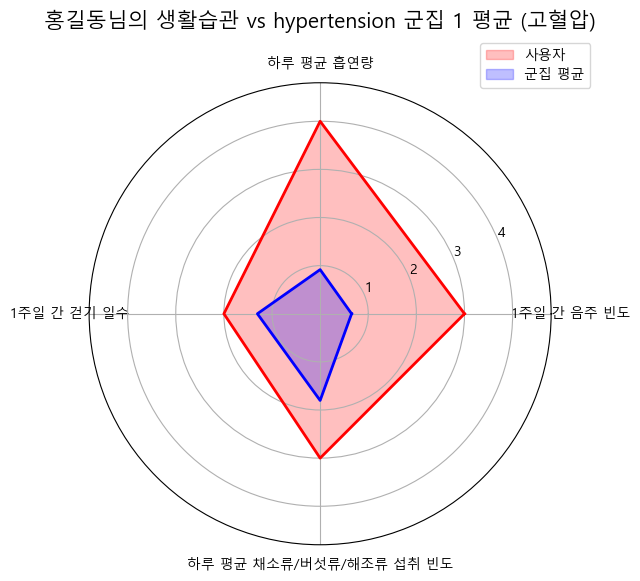


✅ 홍길동님의 diabetes 상태: 정상 (그룹 1)
생활습관을 고려했을 때 정상 그룹의 4번 군집에 속합니다.
| 항목                                     |   홍길동님 수치 |   군집 4 평균 수치 |
|:-----------------------------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도                       |            3.00 |               5.50 |
| 하루 평균 흡연량                         |            4.00 |               5.62 |
| 1주일 간 걷기 일수                       |            2.00 |               3.54 |
| 하루 평균 채소류/버섯류/해조류 섭취 빈도 |            3.00 |               2.21 |


C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:337: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hp_df[c].fillna(mode_value[0] if not mode_value.empty else 0, inplace=True)
c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


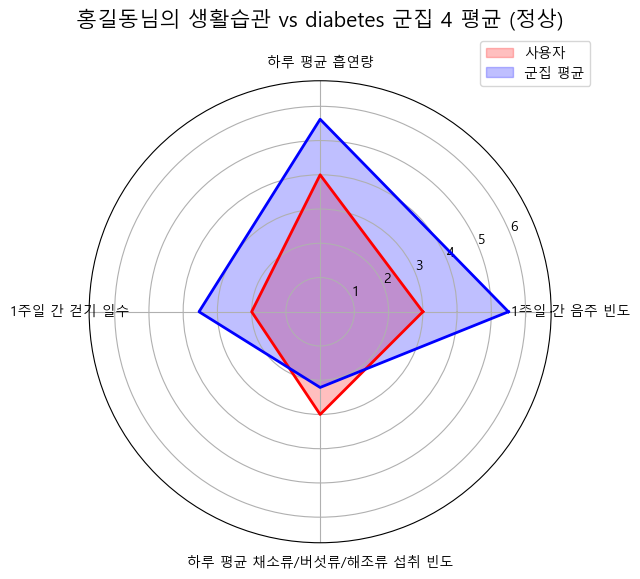

C:\Users\asia\AppData\Local\Temp\ipykernel_23912\485653144.py:337: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hp_df[c].fillna(mode_value[0] if not mode_value.empty else 0, inplace=True)
c:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



✅ 홍길동님의 obesity 상태: 고도비만 (그룹 5)
생활습관을 고려했을 때 고도비만 그룹의 3번 군집에 속합니다.
| 항목                                     |   홍길동님 수치 |   군집 3 평균 수치 |
|:-----------------------------------------|----------------:|-------------------:|
| 1주일 간 음주 빈도                       |            3.00 |               5.50 |
| 하루 평균 흡연량                         |            4.00 |               4.15 |
| 1주일 간 걷기 일수                       |            2.00 |               3.32 |
| 하루 평균 채소류/버섯류/해조류 섭취 빈도 |            3.00 |               2.19 |


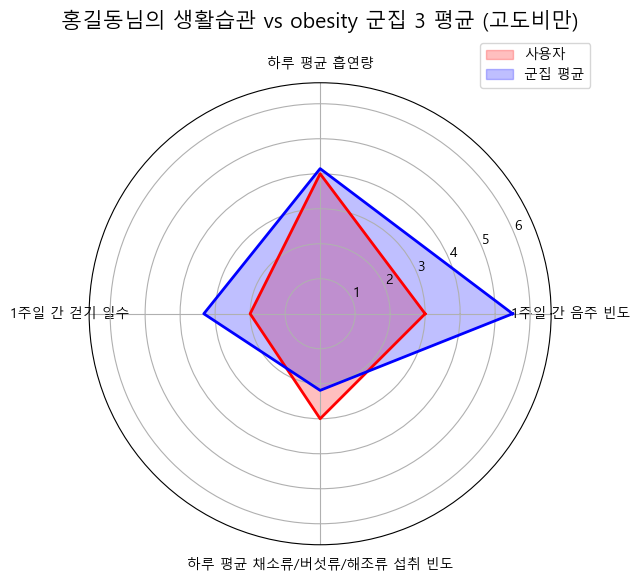

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import pi

# matplotlib 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 사전 계산된 군집 평균 데이터 (사용자 제공)
HE_HP_precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.167185, 0.239176, 3.172158, 1.363797, 0.304851, 0.318776, 0.126048],
        '하루 평균 흡연량': [0.321646, 0.312566, 2.000000, 20.489297, 0.751894, 0.548831, 0.317757],
        '1주일 간 걷기 일수': [0.863567, 6.208025, 4.344316, 3.593272, 2.034091, 6.138927, 0.781931],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.000000, 3.000000, 2.163088, 2.080349, 0.895143, 1.871035, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [0.284722, 2.500000, 0.858974, 0.150502, 0.221657, 5.500000, 0.165176],
        '하루 평균 흡연량': [0.633333, 1.149606, 19.418803, 0.337793, 0.470769, 4.475000, 0.191214],
        '1주일 간 걷기 일수': [6.180556, 4.299213, 3.709402, 1.187291, 1.098462, 4.075000, 6.297158],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [1.796187, 2.448819, 2.183140, 3.000000, 1.785248, 2.387500, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.763355, 0.468248, 1.676724, 0.647671, 5.500000, 0.515860, 0.553569],
        '하루 평균 흡연량': [1.145833, 0.461916, 19.193966, 0.774869, 5.348837, 0.309278, 0.989384],
        '1주일 간 걷기 일수': [5.069444, 1.302211, 3.288793, 6.057592, 4.203488, 6.268041, 1.171975],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [0.925590, 3.000000, 2.207806, 2.000000, 2.347993, 3.000000, 1.914155]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [2.756947, 0.653964, 5.500000, 0.479380, 0.589461, 0.454250],
        '하루 평균 흡연량': [20.293194, 0.917178, 2.215827, 0.298479, 0.627753, 0.253644],
        '1주일 간 걷기 일수': [3.701571, 1.303681, 3.856115, 6.292776, 6.162996, 1.192420],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.301771, 1.801597, 2.403903, 3.000000, 1.854179, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5])
}

HE_DM_precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.150946, 0.372085, 1.158756, 0.228997, 5.500000, 2.500000, 0.237966],
        '하루 평균 흡연량': [0.323770, 0.541776, 19.725768, 0.288396, 5.622449, 1.360502, 0.423890],
        '1주일 간 걷기 일수': [0.927049, 5.964267, 2.933806, 6.161263, 3.537415, 3.819749, 0.981501],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.771406, 2.114544, 3.000000, 2.211099, 2.249319, 1.774280]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [0.512626, 0.579406, 5.500000, 1.479076, 0.455288, 0.619097],
        '하루 평균 흡연량': [0.431724, 0.700143, 5.978166, 18.295597, 0.309375, 0.690799],
        '1주일 간 걷기 일수': [6.137931, 0.982783, 3.187773, 2.732704, 1.046875, 6.037707],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.842255, 2.362445, 2.143043, 3.000000, 1.812732]
    }, index=[0, 1, 2, 3, 4, 5]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.145881, 0.142308, 0.546853, 1.466873, 5.500000, 0.098474],
        '하루 평균 흡연량': [0.161702, 0.342857, 0.309091, 20.496350, 6.471264, 0.170241],
        '1주일 간 걷기 일수': [0.331915, 1.023810, 5.949495, 2.905109, 2.977011, 0.239946],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 0.886941, 2.630303, 2.296130, 2.390805, 2.000000]
    }, index=[0, 1, 2, 3, 4, 5])
}

obe_precalculated_means = {
    1: pd.DataFrame({
        '1주일 간 음주 빈도': [0.041231, 0.499675, 0.140793, 4.500000, 0.955301, 0.043403],
        '하루 평균 흡연량': [0.000000, 0.253165, 0.078788, 7.933333, 17.162162, 0.046875],
        '1주일 간 걷기 일수': [0.144033, 5.886076, 0.454545, 2.766667, 3.513514, 0.138889],
        '하루 평균 채소 섭취 빈도': [3.000000, 2.239894, 0.892453, 2.080913, 2.135061, 2.000000]
    }, index=[0, 1, 2, 3, 4, 5]),
    2: pd.DataFrame({
        '1주일 간 음주 빈도': [1.437870, 0.338664, 0.565225, 0.397819, 5.500000],
        '하루 평균 흡연량': [16.953177, 0.164277, 0.426172, 0.364297, 7.000000],
        '1주일 간 걷기 일수': [2.856187, 3.597969, 6.012378, 0.932149, 3.066327],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [2.208769, 3.000000, 1.795531, 1.804506, 2.276950]
    }, index=[0, 1, 2, 3, 4]),
    3: pd.DataFrame({
        '1주일 간 음주 빈도': [0.378722, 0.526020, 0.595941, 5.500000, 1.447802, 0.462214],
        '하루 평균 흡연량': [0.326613, 0.415435, 0.581359, 4.986486, 19.017857, 0.407733],
        '1주일 간 걷기 일수': [0.987903, 0.957307, 5.990521, 3.567568, 2.852679, 6.130053],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.779103, 1.809968, 2.371122, 2.212353, 3.000000]
    }, index=[0, 1, 2, 3, 4, 5]),
    4: pd.DataFrame({
        '1주일 간 음주 빈도': [0.519089, 0.550410, 2.104251, 0.601160, 0.417795, 5.500000, 1.564362],
        '하루 평균 흡연량': [0.609069, 0.366864, 34.342105, 0.599757, 0.407108, 3.816667, 16.915825],
        '1주일 간 걷기 일수': [1.055147, 6.143491, 3.000000, 5.928224, 1.080775, 3.638889, 2.787879],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [1.812550, 3.000000, 2.289474, 1.808696, 3.000000, 2.355556, 2.102071]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    5: pd.DataFrame({
        '1주일 간 음주 빈도': [0.172308, 0.832751, 0.241978, 5.500000, 2.500000, 0.380881, 0.341026],
        '하루 평균 흡연량': [0.200000, 21.196970, 0.914286, 4.147059, 1.562500, 0.330097, 1.216667],
        '1주일 간 걷기 일수': [5.973333, 3.090909, 5.062857, 3.323529, 4.734375, 0.961165, 0.550000],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 1.890619, 1.764055, 2.189041, 2.069178, 3.000000, 1.813014]
    }, index=[0, 1, 2, 3, 4, 5, 6]),
    6: pd.DataFrame({
        '1주일 간 음주 빈도': [0.175570, 0.255583, 2.500000, 0.225175, 5.500000, 0.913462],
        '하루 평균 흡연량': [0.064815, 0.655914, 5.400000, 0.345455, 9.466667, 22.350000],
        '1주일 간 걷기 일수': [0.435185, 6.139785, 5.466667, 0.563636, 3.133333, 2.400000],
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': [3.000000, 2.174311, 2.333333, 1.796090, 2.228493, 2.042740]
    }, index=[0, 1, 2, 3, 4, 5])
}

# 데이터 전처리 함수
def preprocess_data(data_path):
    df = pd.read_csv(data_path)
    
    # 고혈압(HE_HP2) 전처리
    def classify_bp(row):
        sbp = row['HE_sbp1']
        dbp = row['HE_dbp1']
        if pd.isna(sbp) or pd.isna(dbp):
            return np.nan
        if sbp >= 140 or dbp >= 90:
            return 4
        elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
            return 3
        elif 120 <= sbp <= 129 and dbp < 80:
            return 2
        elif 0 <= sbp < 120 and dbp < 80:
            return 1
    df['HE_HP2'] = df.apply(classify_bp, axis=1)
    df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')
    
    # 당뇨(HE_glu) 전처리
    def classify_diabetes(row):
        fglu = row['HE_glu']
        if pd.isna(fglu):
            return np.nan
        if fglu >= 126:
            return 3  # 당뇨
        elif 100 <= fglu < 126:
            return 2  # 공복혈당장애
        else:
            return 1  # 정상
    df['HE_DM'] = df.apply(classify_diabetes, axis=1)
    df['HE_DM'] = pd.to_numeric(df['HE_DM'], errors='coerce')
    
    # 비만(HE_BMI) 전처리
    def classify_bmi(row):
        bmi = row['HE_BMI']
        if bmi <= 18.5:
            return 1
        elif 18.5 < bmi <= 22.9:
            return 2
        elif 22.9 < bmi <= 24.9:
            return 3
        elif 24.9 < bmi <= 29.9:
            return 4
        elif 29.9 < bmi <= 34.9:
            return 5
        else:
            return 6
    df['HE_BMI_class'] = df.apply(classify_bmi, axis=1)
    df['HE_BMI_class'] = pd.to_numeric(df['HE_BMI_class'], errors='coerce')
    
    # 생활습관 변수 전처리
    df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({
        '1.0': 0, '2.0': 1, '3.0': 2, '4.0': 3, '5.0': 4, '6.0': 5,
        '7.0': 6, '8.0': 7, '88.0': 0, '99.0': np.nan, 'nan': np.nan
    })
    df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')
    
    df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({
        '1.0': 1095, '2.0': 730, '3.0': 365, '4.0': 286, '5.0': 156,
        '6.0': 52, '7.0': 30, '8.0': 12, '9.0': 6, '99.0': np.nan, 'nan': np.nan
    })
    df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')
    
    df['BS3_2'] = df['BS3_2'].replace(888, 0)
    df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan})
    df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
    df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')
    df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)
    df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({'999.0': np.nan})
    df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')
    
    df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({
        '1.0': 0, '2.0': 6, '3.0': 12, '4.0': 42, '5.0': 130, '6.0': 286,
        '8.0': 0, '9.0': np.nan, 'nan': np.nan
    })
    df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')
    
    return df

# 사용자 입력 함수
def get_user_input():
    print("사용자의 건강 및 생활습관 수치를 입력해주세요.")
    name = input("사용자 이름: ")
    sbp = float(input("수축기 혈압 (mmHg): "))
    dbp = float(input("이완기 혈압 (mmHg): "))
    fglu = float(input("공복혈당 (mg/dL): "))
    bmi = float(input("BMI (kg/m²): "))
    weekly_alcohol = float(input("1주일 간 음주 빈도 (회): "))
    daily_smoking = float(input("하루 평균 흡연량 (개비): "))
    weekly_exercise = float(input("1주일 간 걷기 일수 (회): "))
    daily_veg = float(input("하루 평균 채소류/버섯류/해조류 섭취 빈도 (회/일): "))
    return name, sbp, dbp, fglu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg

# 질병 그룹 결정 함수
def determine_disease_groups(sbp, dbp, fglu, bmi):
    # 고혈압
    if sbp >= 140 or dbp >= 90:
        he_hp2 = 4
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        he_hp2 = 3
    elif 120 <= sbp <= 129 and dbp < 80:
        he_hp2 = 2
    else:
        he_hp2 = 1
    
    # 당뇨
    if fglu >= 126:
        he_dm = 3
    elif 100 <= fglu < 126:
        he_dm = 2
    else:
        he_dm = 1
    
    # 비만
    if bmi <= 18.5:
        he_bmi = 1
    elif 18.5 < bmi <= 22.9:
        he_bmi = 2
    elif 22.9 < bmi <= 24.9:
        he_bmi = 3
    elif 24.9 < bmi <= 29.9:
        he_bmi = 4
    elif 29.9 < bmi <= 34.9:
        he_bmi = 5
    else:
        he_bmi = 6
    
    return he_hp2, he_dm, he_bmi

# 군집 결정 함수
def determine_cluster_with_precalculated_means(user_data_weekly_daily, group, disease, scaler, precalculated_means_dict, selected_cols):
    group_int = int(group)
    if group_int not in precalculated_means_dict:
        print(f"{disease} 그룹 {group_int}에 대한 사전 계산된 군집 평균 데이터가 없습니다.")
        return None, None
    
    cluster_means_precalculated_text_names = precalculated_means_dict[group_int].copy()
    text_to_internal_col_mapping = {
        '1주일 간 음주 빈도': 'BD1_11',
        '하루 평균 흡연량': 'tobacco',
        '1주일 간 걷기 일수': 'BE3_31',
        '하루 평균 채소류/버섯류/해조류 섭취 빈도': 'LS_VEG1'
    }
    
    cluster_means_precalculated_internal_names = pd.DataFrame(index=cluster_means_precalculated_text_names.index)
    for internal_col in selected_cols:
        text_col = next((k for k, v in text_to_internal_col_mapping.items() if v == internal_col), None)
        if text_col and text_col in cluster_means_precalculated_text_names.columns:
            cluster_means_precalculated_internal_names[internal_col] = cluster_means_precalculated_text_names[text_col]
        else:
            print(f"경고: {disease}의 내부 컬럼 '{internal_col}'에 대한 텍스트 이름 매핑이 없거나 데이터에 없습니다.")
            return None, None
    
    if cluster_means_precalculated_internal_names.isnull().values.any():
        print(f"경고: {disease}의 스케일링하려는 사전 계산된 평균 데이터에 결측치가 포함되어 있습니다.")
        return None, None
    
    scaled_precalculated_centroids = scaler.transform(cluster_means_precalculated_internal_names[selected_cols])
    
    user_data_transformed = [
        user_data_weekly_daily[0] * 52,  # 연간 음주
        user_data_weekly_daily[1],       # 하루 흡연
        user_data_weekly_daily[2],       # 주간 걷기
        user_data_weekly_daily[3] * 365  # 연간 채소
    ]
    
    user_data_scaled = scaler.transform([user_data_transformed])
    distances = np.linalg.norm(scaled_precalculated_centroids - user_data_scaled, axis=1)
    closest_cluster = np.argmin(distances)
    cluster_means = precalculated_means_dict[group_int].iloc[closest_cluster]
    
    return closest_cluster, cluster_means

# 레이더 차트 생성 함수
def plot_radar_chart(user_data, cluster_mean, categories, title):
    values_user = user_data[:]
    values_cluster = cluster_mean[:]
    all_values = values_user + values_cluster
    max_val = max(all_values) if all_values else 1
    
    values_user = values_user + values_user[:1]
    values_cluster = values_cluster + values_cluster[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_ylim(0, max_val * 1.2)
    ax.fill(angles, values_user, color='red', alpha=0.25, label='사용자')
    ax.plot(angles, values_user, color='red', linewidth=2)
    ax.fill(angles, values_cluster, color='blue', alpha=0.25, label='군집 평균')
    ax.plot(angles, values_cluster, color='blue', linewidth=2)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.grid(True)
    plt.savefig(f"{title.replace(' ', '_')}.png")
    plt.show()

# 메인 서비스 함수
def health_comparison_service(data_path="건강데이터_2022_2023_합본.csv"):
    df = preprocess_data(data_path)
    selected_cols = ['BD1_11', 'tobacco', 'BE3_31', 'LS_VEG1']
    item_names = ['1주일 간 음주 빈도', '하루 평균 흡연량', '1주일 간 걷기 일수', '하루 평균 채소류/버섯류/해조류 섭취 빈도']
    
    name, sbp, dbp, fglu, bmi, weekly_alcohol, daily_smoking, weekly_exercise, daily_veg = get_user_input()
    he_hp2, he_dm, he_bmi = determine_disease_groups(sbp, dbp, fglu, bmi)
    
    disease_labels = {
        'hypertension': {1: "정상", 2: "주의 혈압", 3: "고혈압 전단계", 4: "고혈압"},
        'diabetes': {1: "정상", 2: "당뇨 전단계", 3: "당뇨"},
        'obesity': {1: "저체중", 2: "정상", 3: "과체중", 4: "비만", 5: "고도비만", 6: "초고도비만"}
    }
    
    diseases = [
        ('hypertension', he_hp2, HE_HP_precalculated_means, 'HE_HP2'),
        ('diabetes', he_dm, HE_DM_precalculated_means, 'HE_DM'),
        ('obesity', he_bmi, obe_precalculated_means, 'HE_BMI_class')
    ]
    
    user_data = [weekly_alcohol, daily_smoking, weekly_exercise, daily_veg]
    
    for disease, group, precalculated_means, col in diseases:
        group_int = int(group)
        print(f"\n✅ {name}님의 {disease} 상태: {disease_labels[disease][group_int]} (그룹 {group_int})")
        
        hp_df = df[df[col] == group_int][selected_cols].copy()
        if hp_df.empty:
            print(f"{disease} 그룹 {group_int}에 데이터가 없어 비교를 수행할 수 없습니다.")
            continue
        
        for c in selected_cols:
            if hp_df[c].isnull().any():
                mode_value = hp_df[c].mode(dropna=True)
                hp_df[c].fillna(mode_value[0] if not mode_value.empty else 0, inplace=True)
        
        scaler = StandardScaler()
        scaler.fit(hp_df[selected_cols])
        
        cluster, cluster_means = determine_cluster_with_precalculated_means(
            user_data, group_int, disease, scaler, precalculated_means, selected_cols
        )
        
        if cluster is not None:
            print(f"생활습관을 고려했을 때 {disease_labels[disease][group_int]} 그룹의 {cluster}번 군집에 속합니다.")
            
            table_data = {
                '항목': item_names,
                f'{name}님 수치': user_data,
                f'군집 {cluster} 평균 수치': cluster_means.tolist()
            }
            comparison_df = pd.DataFrame(table_data)
            print(comparison_df.to_markdown(index=False, floatfmt=".2f"))
            
            plot_radar_chart(
                user_data,
                cluster_means.tolist(),
                item_names,
                f"{name}님의 생활습관 vs {disease} 군집 {cluster} 평균 ({disease_labels[disease][group_int]})"
            )

if __name__ == "__main__":
    health_comparison_service()